## Energy-based Flow Classifier
Reference:
>_C. F. T. Pontes, M. M. C. de Souza, J. J. C. Gondim, M. Bishop and M. A. Marotta, A New Method for Flow-Based Network Intrusion Detection Using the Inverse Potts Model, in IEEE Transactions on Network and Service Management, vol. 18, no. 2, pp. 1125-1136, June 2021, doi: 10.1109/TNSM.2021.3075503._

https://efc-package.readthedocs.io/en/latest/quick_start.html

https://github.com/EnergyBasedFlowClassifier/EFC-package

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import f1_score
import efc as efc

/home/leohmelo/venv/lib/python3.10/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/leohmelo/venv/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/leohmelo/venv/lib/python3.10/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/leohmelo/venv/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


In [2]:
from efc import EnergyBasedFlowClassifier

# Loading silos

In [3]:
from os import listdir
from os.path import isfile, join
import pandas as pd

silos_path = "./datasets/silos/"
silos_files = [f for f in listdir(silos_path) if isfile(join(silos_path, f))]

silos = {}
for silo in silos_files:
    silo_name = silo.replace(".csv.gz", "")
    silos[silo_name] = pd.read_csv(silos_path + silo)
    print(f"{silo_name} >>> {silos[silo_name]['Label'].value_counts()}")

# Not applicable features

In [4]:
# Other candidates to be removed:
# ICMP_TYPE', 'ICMP_IPV4_TYPE', 'DNS_QUERY_ID', 'DNS_QUERY_TYPE', 'DNS_TTL_ANSWER', 'FTP_COMMAND_RET_CODE'
#not_applicable_features = ['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT', 'PROTOCOL', 
#                           'L7_PROTO', 'Attack', 'Dataset'] # 'Label', 

#for _, silo in silos.items():
#    silo.drop(not_applicable_features, axis=1, inplace=True)

In [5]:
def preprocess(X):
    cols = X.select_dtypes(include=[np.float64]).columns
    X[cols] = X[cols].astype(np.float32)

    X.fillna(0, inplace=True)
    X.replace(np.inf, 9999, inplace=True)
    
    return X

# Evaluating EFC on Silos

In [6]:
%matplotlib inline

agent16.csv | cutoff = 982.9077216733418 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      7114
           1       0.13      0.19      0.16       308

    accuracy                           0.92      7422
   macro avg       0.55      0.57      0.56      7422
weighted avg       0.93      0.92      0.92      7422



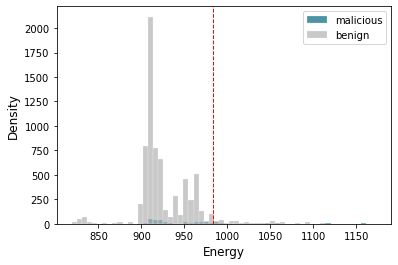

agent12.csv | cutoff = 950.2544187463238 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.18      0.94      0.30      9333
           1       1.00      0.98      0.99   2644645

    accuracy                           0.98   2653978
   macro avg       0.59      0.96      0.65   2653978
weighted avg       1.00      0.98      0.99   2653978



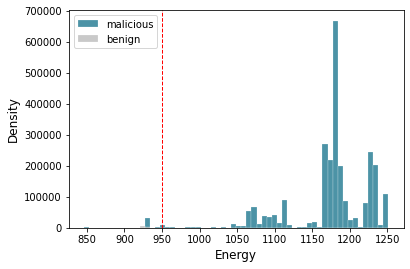

agent2.csv | cutoff = 993.2082617580064 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       1.00      0.93      0.96    216473
           1       0.00      0.00      0.00        62

    accuracy                           0.93    216535
   macro avg       0.50      0.47      0.48    216535
weighted avg       1.00      0.93      0.96    216535



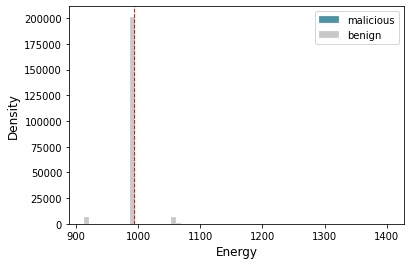

agent17.csv | cutoff = 991.729547603698 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      6319
           1       0.12      0.14      0.13       326

    accuracy                           0.91      6645
   macro avg       0.54      0.54      0.54      6645
weighted avg       0.91      0.91      0.91      6645



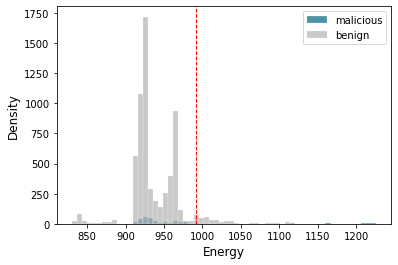

agent10.csv | cutoff = 940.0348387027029 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.78      0.96      0.86      1427
           1       1.00      1.00      1.00    324891

    accuracy                           1.00    326318
   macro avg       0.89      0.98      0.93    326318
weighted avg       1.00      1.00      1.00    326318



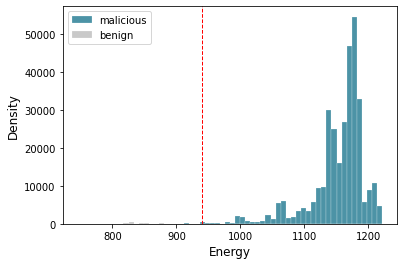

agent6.csv | cutoff = 958.3517998938657 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       1.00      0.95      0.97     84614
           1       0.86      1.00      0.93     28600

    accuracy                           0.96    113214
   macro avg       0.93      0.97      0.95    113214
weighted avg       0.96      0.96      0.96    113214



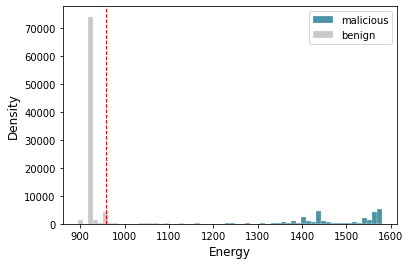

agent15.csv | cutoff = 995.4978503432205 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.07      0.94      0.13       956
           1       1.00      0.98      0.99    711539

    accuracy                           0.98    712495
   macro avg       0.53      0.96      0.56    712495
weighted avg       1.00      0.98      0.99    712495



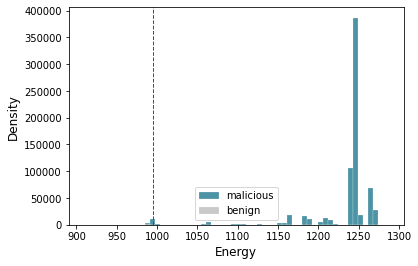

agent11.csv | cutoff = 936.340260304797 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.11      0.93      0.19       400
           1       1.00      0.97      0.98     92190

    accuracy                           0.97     92590
   macro avg       0.55      0.95      0.59     92590
weighted avg       1.00      0.97      0.98     92590



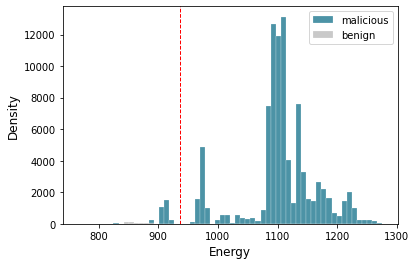

agent7.csv | cutoff = 966.5121761631157 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       1.00      0.95      0.97    101072
           1       0.00      0.10      0.00        73

    accuracy                           0.95    101145
   macro avg       0.50      0.52      0.49    101145
weighted avg       1.00      0.95      0.97    101145



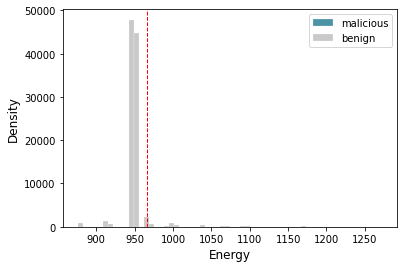

agent19.csv | cutoff = 982.9812255779701 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      5779
           1       0.11      0.11      0.11       321

    accuracy                           0.91      6100
   macro avg       0.53      0.53      0.53      6100
weighted avg       0.91      0.91      0.91      6100



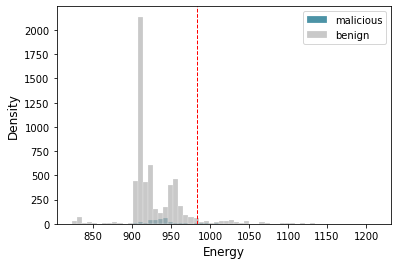

agent1.csv | cutoff = 1061.563211852591 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.98      0.95      0.97     19473
           1       1.00      1.00      1.00    445716

    accuracy                           1.00    465189
   macro avg       0.99      0.97      0.98    465189
weighted avg       1.00      1.00      1.00    465189



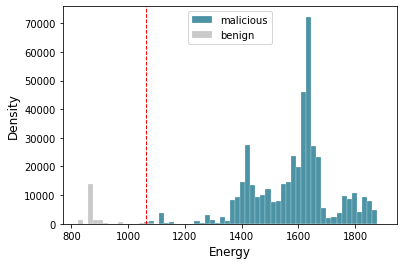

agent3.csv | cutoff = 1013.8223424555778 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       1.00      0.95      0.97     89084
           1       0.95      1.00      0.98     91792

    accuracy                           0.98    180876
   macro avg       0.98      0.98      0.98    180876
weighted avg       0.98      0.98      0.98    180876



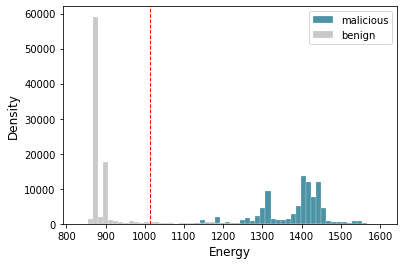

agent9.csv | cutoff = 925.0201417433183 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       1.00      0.92      0.96       427
           1       0.96      1.00      0.98       852

    accuracy                           0.97      1279
   macro avg       0.98      0.96      0.97      1279
weighted avg       0.97      0.97      0.97      1279



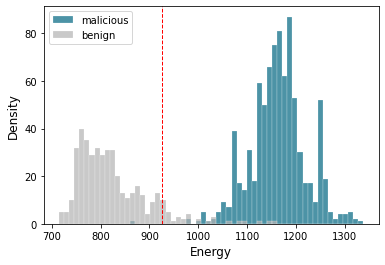

agent18.csv | cutoff = 987.2918571622077 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      6157
           1       0.01      0.01      0.01       282

    accuracy                           0.91      6439
   macro avg       0.48      0.48      0.48      6439
weighted avg       0.91      0.91      0.91      6439



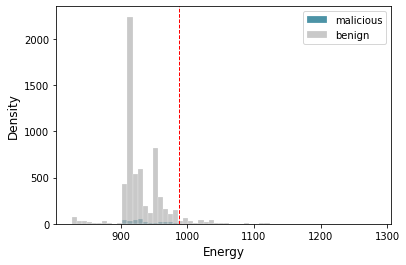

agent4.csv | cutoff = 987.6955354653768 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       1.00      0.95      0.97    186216
           1       0.14      1.00      0.25      1556

    accuracy                           0.95    187772
   macro avg       0.57      0.97      0.61    187772
weighted avg       0.99      0.95      0.97    187772



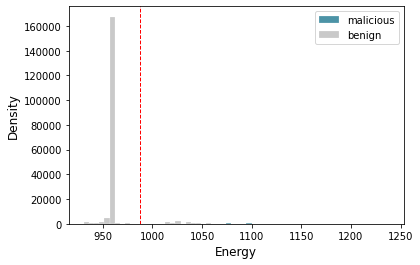

agent13.csv | cutoff = 1033.2807866932833 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.06      0.94      0.11      1109
           1       1.00      0.99      0.99   1292659

    accuracy                           0.99   1293768
   macro avg       0.53      0.96      0.55   1293768
weighted avg       1.00      0.99      0.99   1293768



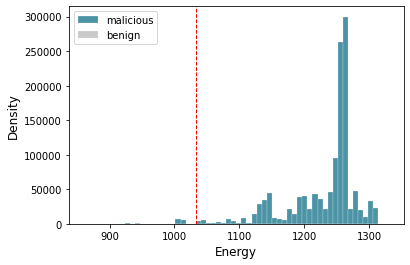

agent5.csv | cutoff = 1031.7048476808554 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       1.00      0.95      0.97    187168
           1       0.74      1.00      0.85     27373

    accuracy                           0.96    214541
   macro avg       0.87      0.97      0.91    214541
weighted avg       0.97      0.96      0.96    214541



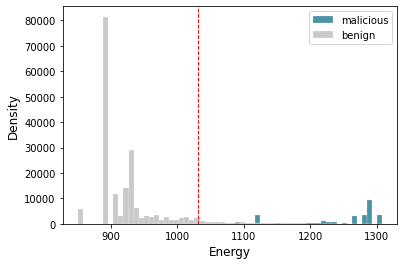

agent14.csv | cutoff = 965.2151847886167 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.06      0.94      0.12      1157
           1       1.00      0.98      0.99    849477

    accuracy                           0.98    850634
   macro avg       0.53      0.96      0.55    850634
weighted avg       1.00      0.98      0.99    850634



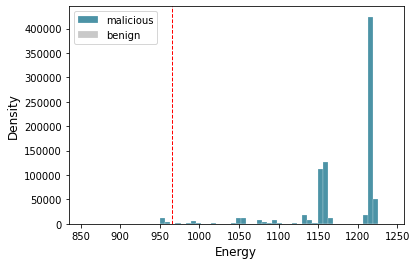

agent8.csv | cutoff = 1029.0818805292956 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.83      0.95      0.89     19195
           1       0.89      0.68      0.77     11448

    accuracy                           0.85     30643
   macro avg       0.86      0.82      0.83     30643
weighted avg       0.85      0.85      0.85     30643



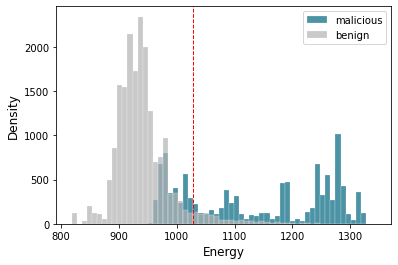

In [7]:
from sklearn.preprocessing import StandardScaler

siloed_efc = {}

for key, silo in silos.items():
    
    X = silo.drop(columns="Label").copy()
    X = preprocess(X)
    y = silo["Label"].copy()
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=42, stratify=y, shuffle=True, test_size=0.3
    )
    
    # EFC already contains MaxAbsScaler
    #scaler = StandardScaler()
    #X_train = scaler.fit_transform(X_train)
    #X_test = scaler.transform(X_test)
    
    # train and test EFC
    clf = EnergyBasedFlowClassifier(cutoff_quantile=0.95)
    clf.fit(X_train, y_train)
    
    siloed_efc[key] = clf
    
    y_pred, y_energies = clf.predict(X_test, return_energies=True)
    
    print(key, "| cutoff =", clf.estimators_[0].cutoff_, "\n-------------------------------------------------------------------\n", classification_report(y_test, y_pred))
    
    # ploting energies
    benign = np.where(y_test == 0)[0]
    malicious = np.where(y_test == 1)[0]

    benign_energies = y_energies[benign]
    malicious_energies = y_energies[malicious]
    cutoff = clf.estimators_[0].cutoff_

    bins = np.histogram(y_energies, bins=60)[1]

    plt.hist(
        malicious_energies,
        bins,
        facecolor="#006680",
        alpha=0.7,
        ec="white",
        linewidth=0.3,
        label="malicious",
    )
    plt.hist(
        benign_energies,
        bins,
        facecolor="#b3b3b3",
        alpha=0.7,
        ec="white",
        linewidth=0.3,
        label="benign",
    )
    plt.axvline(cutoff, color="r", linestyle="dashed", linewidth=1)
    plt.legend()

    plt.xlabel("Energy", fontsize=12)
    plt.ylabel("Density", fontsize=12)

    plt.show()
    
    

# Cross-silo EFC evaluation

In [8]:
data = {}
full = []
avg_info = {} 

for model_key, model in siloed_efc.items():
    for key, silo in silos.items():
        #if model_key == key:
        #    continue
            
        X = silo.drop(columns="Label").copy()
        #X.dropna(inplace=True)
        X = preprocess(X)
        y = silo["Label"].copy()
    
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, random_state=42, stratify=y, shuffle=True, test_size=0.3
        )
        
        y_pred = model.predict(X_test)
        score = f1_score(y_test, y_pred)
        data[key] = score
        print(model_key, "on", key, "--> f1-score =", score)
    
    full.append(data)
    avg_info[model_key] = data
    data = {}

agent16.csv on agent16.csv --> f1-score = 0.15696887686062244
agent16.csv on agent12.csv --> f1-score = 0.9982385989718461
agent16.csv on agent2.csv --> f1-score = 0.0005724944135625774
agent16.csv on agent17.csv --> f1-score = 0.1010222489476849
agent16.csv on agent10.csv --> f1-score = 0.997813287961106
agent16.csv on agent6.csv --> f1-score = 0.40334522684643265
agent16.csv on agent15.csv --> f1-score = 0.9993286677143944
agent16.csv on agent11.csv --> f1-score = 0.9834263849316798
agent16.csv on agent7.csv --> f1-score = 0.001442431188128594
agent16.csv on agent19.csv --> f1-score = 0.06088682991396426
agent16.csv on agent1.csv --> f1-score = 0.978622359082451
agent16.csv on agent3.csv --> f1-score = 0.6732901304521632
agent16.csv on agent9.csv --> f1-score = 0.7996245893946504
agent16.csv on agent18.csv --> f1-score = 0.05622489959839357
agent16.csv on agent4.csv --> f1-score = 0.01643829827693673
agent16.csv on agent13.csv --> f1-score = 0.9995712231584343
agent16.csv on agent5.c

In [9]:
cross_silo_efc = pd.DataFrame(full, index=list(siloed_efc.keys()))

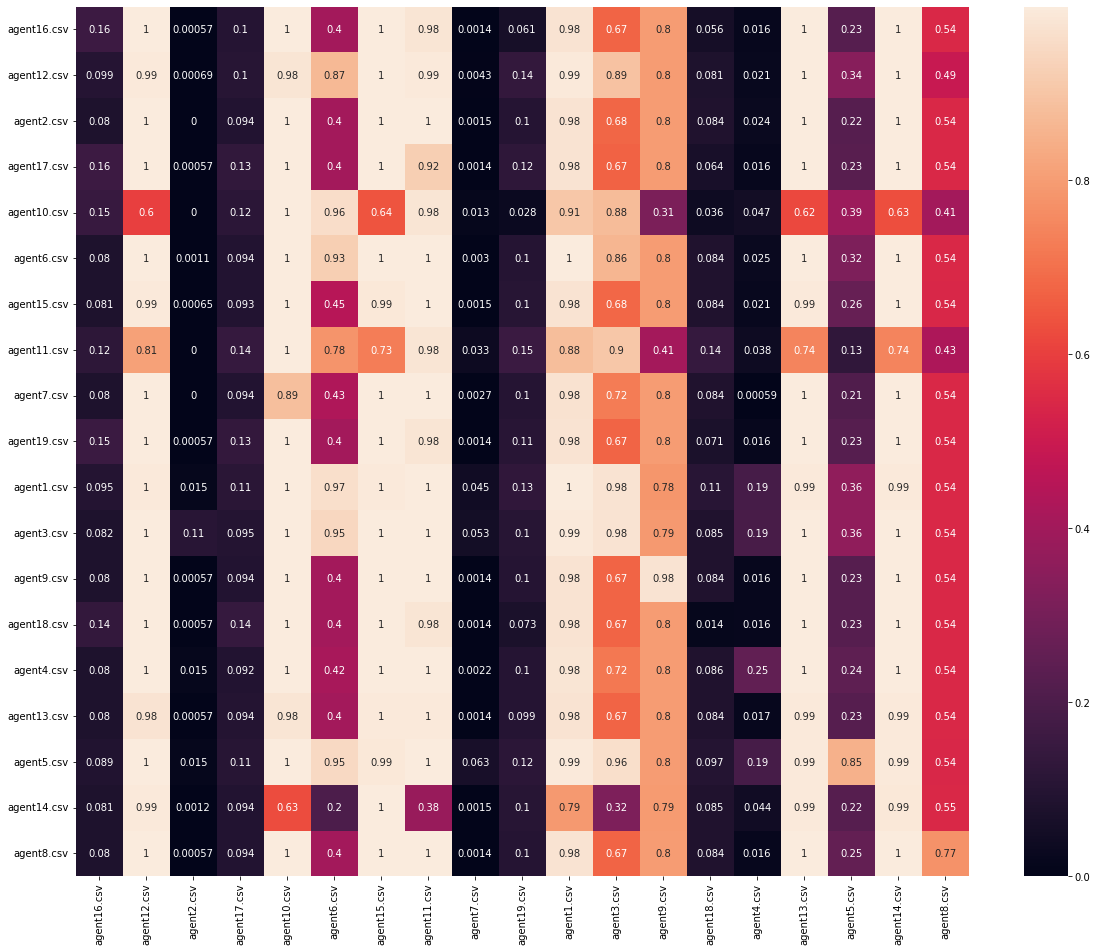

In [10]:
import seaborn as sns
plt.figure(figsize = (20,16))
ax = sns.heatmap(cross_silo_efc, xticklabels=cross_silo_efc.columns, yticklabels=cross_silo_efc.columns, annot=True)

In [11]:
#full

[{'agent16.csv': 0.15696887686062244,
  'agent12.csv': 0.9982385989718461,
  'agent2.csv': 0.0005724944135625774,
  'agent17.csv': 0.1010222489476849,
  'agent10.csv': 0.997813287961106,
  'agent6.csv': 0.40334522684643265,
  'agent15.csv': 0.9993286677143944,
  'agent11.csv': 0.9834263849316798,
  'agent7.csv': 0.001442431188128594,
  'agent19.csv': 0.06088682991396426,
  'agent1.csv': 0.978622359082451,
  'agent3.csv': 0.6732901304521632,
  'agent9.csv': 0.7996245893946504,
  'agent18.csv': 0.05622489959839357,
  'agent4.csv': 0.01643829827693673,
  'agent13.csv': 0.9995712231584343,
  'agent5.csv': 0.2263035624230098,
  'agent14.csv': 0.9993194562002128,
  'agent8.csv': 0.5439642678957497},
 {'agent16.csv': 0.0991394148020654,
  'agent12.csv': 0.9921474411791544,
  'agent2.csv': 0.000693233149961984,
  'agent17.csv': 0.10437339213524438,
  'agent10.csv': 0.9806516340860042,
  'agent6.csv': 0.8684334421748044,
  'agent15.csv': 0.9991329973610211,
  'agent11.csv': 0.9926814127487177,


In [12]:
#type(full)

list

In [13]:
for i in range(len(avg_info)):
    agent = "agent" + str(i+1) + ".csv"

In [14]:
def average(lst):
    return sum(lst) / len(lst)

In [15]:
# Calculo da média do modelo de cada um dos agentes avaliado em outros datasets
average_f1_score = dict()

for i in range(len(avg_info)):
    name = "agent" + str(i+1) + ".csv"
    average_f1_score[name] = average(avg_info[name].values())

for name, value in average_f1_score.items():
    print(value)

0.5941738083988904
0.5262280904140794
0.5958845798847757
0.5429501288918234
0.6181308611773236
0.5696022816531159
0.5222938966815098
0.5394934470896626
0.5354150704312479
0.4587459323940945
0.482473242678676
0.5681878925760532
0.522970040127259
0.43482558493507023
0.5301753474684218
0.5261265175911274
0.5281184788681653
0.5255704829250156
0.5307046823279912


## EFC Analysis within downsampling 

Rebalance functions 

---

In [18]:
from sklearn.utils import resample

In [19]:
# Flag que habilita o balanceamento entre classes de ataque e dados benignos 
balanced = True 
def rebalance_agent(agent):
    agent_label_count = agent["Label"].value_counts().to_dict()
    benign_count = agent_label_count[0] 
    malicious_count = agent_label_count[1]
    
    if(balanced):
        if (benign_count > malicious_count):
            downsampled_0 = resample(
                                agent[agent.Label == 0], 
                                replace=False, 
                                n_samples=agent[agent.Label == 1].shape[0],
                                random_state=1337
                            )
            agent_balanced = pd.concat([downsampled_0, agent[agent.Label == 1]])
        elif (benign_count < malicious_count): 
            downsampled_1 = resample(
                                agent[agent.Label == 1], 
                                replace=False, 
                                n_samples=agent[agent.Label == 0].shape[0], 
                                random_state=1337
                            )
            agent_balanced = pd.concat([downsampled_1, agent[agent.Label == 0]])
        else:
            agent_balanced = agent
    else:
        agent_balanced = agent
    
    return agent_balanced

---

0    720
1    720
Name: Label, dtype: int64
agent16.csv | cutoff = 1000.4785889710871 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.97      0.93      0.95      7114
           1       0.19      0.39      0.26       308

    accuracy                           0.91      7422
   macro avg       0.58      0.66      0.60      7422
weighted avg       0.94      0.91      0.92      7422



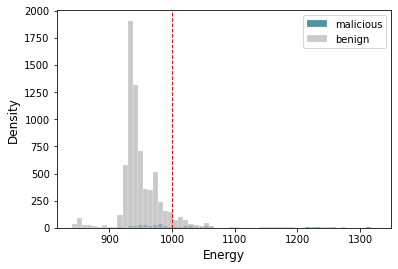

1    21778
0    21778
Name: Label, dtype: int64
agent12.csv | cutoff = 1010.7782621369768 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.22      0.95      0.36      9333
           1       1.00      0.99      0.99   2644645

    accuracy                           0.99   2653978
   macro avg       0.61      0.97      0.68   2653978
weighted avg       1.00      0.99      0.99   2653978



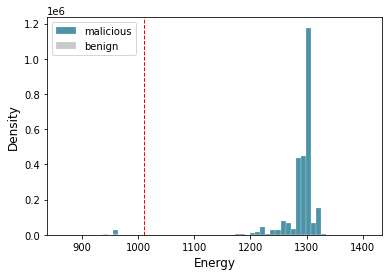

0    146
1    146
Name: Label, dtype: int64
agent2.csv | cutoff = 964.4054460891223 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       1.00      0.88      0.93    216473
           1       0.00      1.00      0.00        62

    accuracy                           0.88    216535
   macro avg       0.50      0.94      0.47    216535
weighted avg       1.00      0.88      0.93    216535



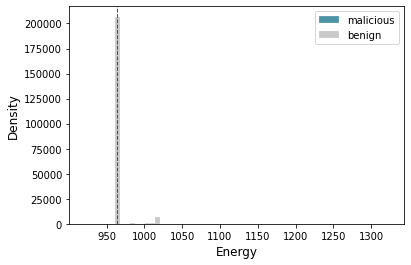

0    761
1    761
Name: Label, dtype: int64
agent17.csv | cutoff = 991.8635461506088 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      6319
           1       0.15      0.21      0.17       326

    accuracy                           0.90      6645
   macro avg       0.55      0.57      0.56      6645
weighted avg       0.92      0.90      0.91      6645



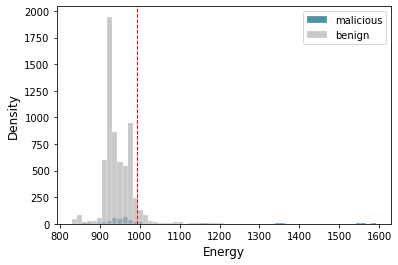

1    3329
0    3329
Name: Label, dtype: int64
agent10.csv | cutoff = 986.8116557598544 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.98      0.94      0.96      1427
           1       1.00      1.00      1.00    324891

    accuracy                           1.00    326318
   macro avg       0.99      0.97      0.98    326318
weighted avg       1.00      1.00      1.00    326318



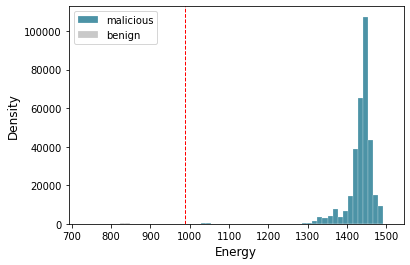

0    66733
1    66733
Name: Label, dtype: int64
agent6.csv | cutoff = 948.8587593892709 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       1.00      0.95      0.97     84614
           1       0.86      1.00      0.93     28600

    accuracy                           0.96    113214
   macro avg       0.93      0.97      0.95    113214
weighted avg       0.97      0.96      0.96    113214



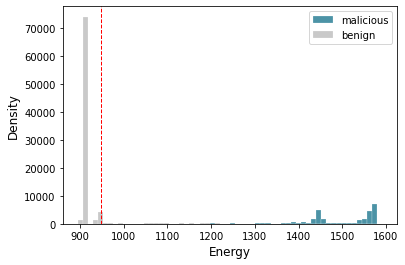

1    2232
0    2232
Name: Label, dtype: int64
agent15.csv | cutoff = 1019.3205574656411 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.07      0.94      0.13       956
           1       1.00      0.98      0.99    711539

    accuracy                           0.98    712495
   macro avg       0.53      0.96      0.56    712495
weighted avg       1.00      0.98      0.99    712495



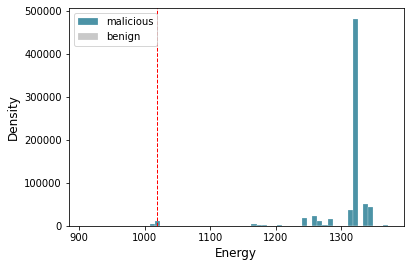

1    933
0    933
Name: Label, dtype: int64
agent11.csv | cutoff = 985.1595525571092 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.51      0.93      0.66       400
           1       1.00      1.00      1.00     92190

    accuracy                           1.00     92590
   macro avg       0.76      0.96      0.83     92590
weighted avg       1.00      1.00      1.00     92590



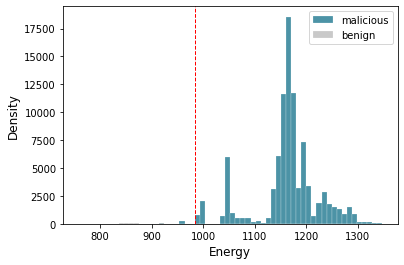

0    169
1    169
Name: Label, dtype: int64
agent7.csv | cutoff = 964.0632723839326 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       1.00      0.92      0.96    101072
           1       0.01      1.00      0.02        73

    accuracy                           0.92    101145
   macro avg       0.50      0.96      0.49    101145
weighted avg       1.00      0.92      0.96    101145



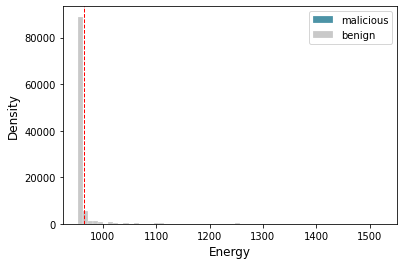

0    749
1    749
Name: Label, dtype: int64
agent19.csv | cutoff = 998.2069625737271 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      5779
           1       0.12      0.17      0.14       321

    accuracy                           0.89      6100
   macro avg       0.53      0.55      0.54      6100
weighted avg       0.91      0.89      0.90      6100



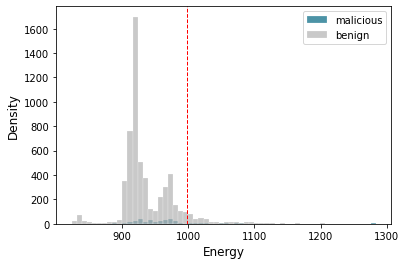

1    45436
0    45436
Name: Label, dtype: int64
agent1.csv | cutoff = 1072.1276317646364 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.98      0.95      0.97     19473
           1       1.00      1.00      1.00    445716

    accuracy                           1.00    465189
   macro avg       0.99      0.97      0.98    465189
weighted avg       1.00      1.00      1.00    465189



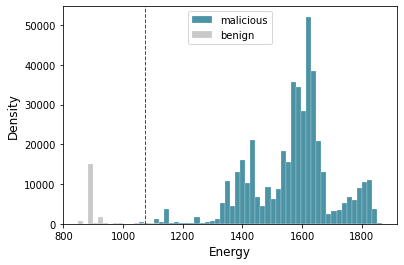

1    207863
0    207863
Name: Label, dtype: int64
agent3.csv | cutoff = 1004.3262880989778 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       1.00      0.95      0.97     89084
           1       0.95      1.00      0.98     91792

    accuracy                           0.97    180876
   macro avg       0.98      0.97      0.97    180876
weighted avg       0.98      0.97      0.97    180876



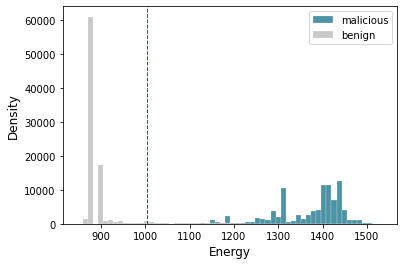

1    997
0    997
Name: Label, dtype: int64
agent9.csv | cutoff = 935.1432875659453 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       1.00      0.91      0.95       427
           1       0.96      1.00      0.98       852

    accuracy                           0.97      1279
   macro avg       0.98      0.96      0.97      1279
weighted avg       0.97      0.97      0.97      1279



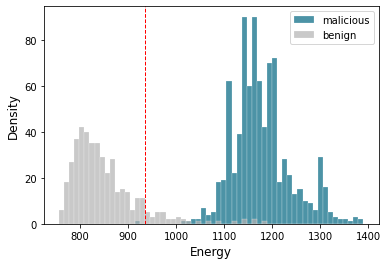

0    658
1    658
Name: Label, dtype: int64
agent18.csv | cutoff = 989.237825828661 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.97      0.92      0.95      6157
           1       0.15      0.30      0.20       282

    accuracy                           0.90      6439
   macro avg       0.56      0.61      0.57      6439
weighted avg       0.93      0.90      0.91      6439



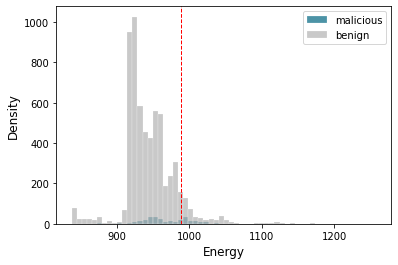

0    3631
1    3631
Name: Label, dtype: int64
agent4.csv | cutoff = 1023.9508015149896 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       1.00      0.95      0.98    186216
           1       0.15      0.98      0.26      1556

    accuracy                           0.95    187772
   macro avg       0.58      0.97      0.62    187772
weighted avg       0.99      0.95      0.97    187772



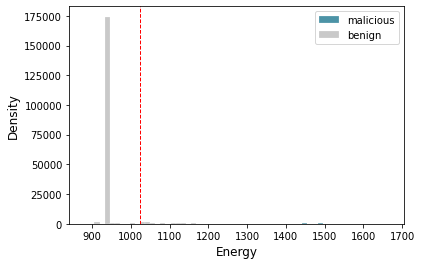

1    2588
0    2588
Name: Label, dtype: int64
agent13.csv | cutoff = 958.7061914425353 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       1.00      0.94      0.97      1109
           1       1.00      1.00      1.00   1292659

    accuracy                           1.00   1293768
   macro avg       1.00      0.97      0.99   1293768
weighted avg       1.00      1.00      1.00   1293768



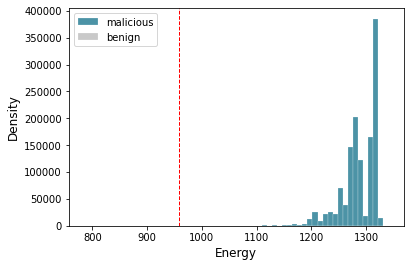

0    63870
1    63870
Name: Label, dtype: int64
agent5.csv | cutoff = 1018.8549266549337 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       1.00      0.95      0.97    187168
           1       0.74      1.00      0.85     27373

    accuracy                           0.95    214541
   macro avg       0.87      0.97      0.91    214541
weighted avg       0.97      0.95      0.96    214541



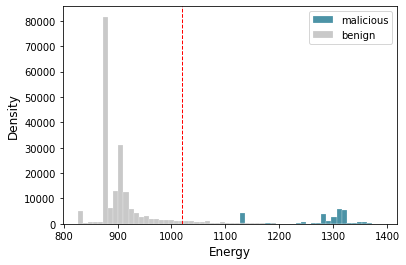

1    2700
0    2700
Name: Label, dtype: int64
agent14.csv | cutoff = 1001.2208950189092 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.08      0.93      0.15      1157
           1       1.00      0.99      0.99    849477

    accuracy                           0.99    850634
   macro avg       0.54      0.96      0.57    850634
weighted avg       1.00      0.99      0.99    850634



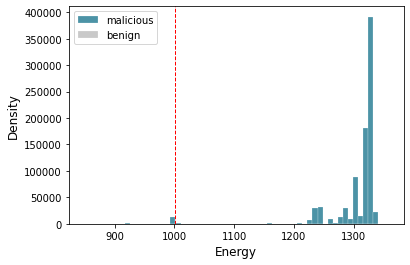

0    26712
1    26712
Name: Label, dtype: int64
agent8.csv | cutoff = 1029.2116011282626 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.85      0.95      0.90     19195
           1       0.89      0.71      0.79     11448

    accuracy                           0.86     30643
   macro avg       0.87      0.83      0.84     30643
weighted avg       0.86      0.86      0.86     30643



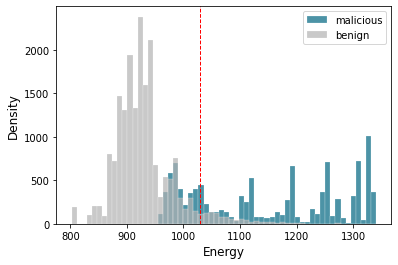

In [20]:
siloed_down_efc = {}

for key, silo in silos.items():
    
    X = silo.drop(columns="Label").copy()
    X = preprocess(X)
    y = silo["Label"].copy()
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=42, stratify=y, shuffle=True, test_size=0.3
    )
    
    X_train["Label"] = y_train 
    X_train = rebalance_agent(X_train) 
    y_train = X_train["Label"] 
    X_train = X_train.drop(columns="Label").copy() 
    
    # train and test EFC
    clf = EnergyBasedFlowClassifier(cutoff_quantile=0.95)
    print(y_train.value_counts())
    clf.fit(X_train, y_train)
    
    siloed_down_efc[key] = clf
    
    y_pred, y_energies = clf.predict(X_test, return_energies=True)
    
    print(key, "| cutoff =", clf.estimators_[0].cutoff_, "\n-------------------------------------------------------------------\n", classification_report(y_test, y_pred))
    
    # ploting energies
    benign = np.where(y_test == 0)[0]
    malicious = np.where(y_test == 1)[0]

    benign_energies = y_energies[benign]
    malicious_energies = y_energies[malicious]
    cutoff = clf.estimators_[0].cutoff_

    bins = np.histogram(y_energies, bins=60)[1]

    plt.hist(
        malicious_energies,
        bins,
        facecolor="#006680",
        alpha=0.7,
        ec="white",
        linewidth=0.3,
        label="malicious",
    )
    plt.hist(
        benign_energies,
        bins,
        facecolor="#b3b3b3",
        alpha=0.7,
        ec="white",
        linewidth=0.3,
        label="benign",
    )
    plt.axvline(cutoff, color="r", linestyle="dashed", linewidth=1)
    plt.legend()

    plt.xlabel("Energy", fontsize=12)
    plt.ylabel("Density", fontsize=12)

    plt.show()
    

# Cross-silo EFC evaluation downsampling

In [21]:
data_down = {}
full_down = []
avg_down_info = {} 

for model_key, model in siloed_down_efc.items():
    for key, silo in silos.items():
        #if model_key == key:
        #    continue
            
        X = silo.drop(columns="Label").copy()
        #X.dropna(inplace=True)
        X = preprocess(X)
        y = silo["Label"].copy()
    
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, random_state=42, stratify=y, shuffle=True, test_size=0.3
        )
        
        y_pred = model.predict(X_test)
        score = f1_score(y_test, y_pred)
        data_down[key] = score
        print(model_key, "on", key, "--> f1-score =", score)
    
    full_down.append(data_down)
    avg_down_info[model_key] = data_down
    data_down = {}

agent16.csv on agent16.csv --> f1-score = 0.25827107790821774
agent16.csv on agent12.csv --> f1-score = 0.9980438101210316
agent16.csv on agent2.csv --> f1-score = 0.0005724944135625774
agent16.csv on agent17.csv --> f1-score = 0.16070307595731323
agent16.csv on agent10.csv --> f1-score = 0.9978163524794073
agent16.csv on agent6.csv --> f1-score = 0.4035244901270537
agent16.csv on agent15.csv --> f1-score = 0.9989413231704103
agent16.csv on agent11.csv --> f1-score = 0.9821635675063624
agent16.csv on agent7.csv --> f1-score = 0.001442431188128594
agent16.csv on agent19.csv --> f1-score = 0.09312320916905444
agent16.csv on agent1.csv --> f1-score = 0.9786610368779703
agent16.csv on agent3.csv --> f1-score = 0.6735841026167868
agent16.csv on agent9.csv --> f1-score = 0.7996245893946504
agent16.csv on agent18.csv --> f1-score = 0.10115783059110298
agent16.csv on agent4.csv --> f1-score = 0.016438471940500337
agent16.csv on agent13.csv --> f1-score = 0.9991413041964695
agent16.csv on agent

In [22]:
cross_silo_down_efc = pd.DataFrame(full_down, index=list(siloed_down_efc.keys()))

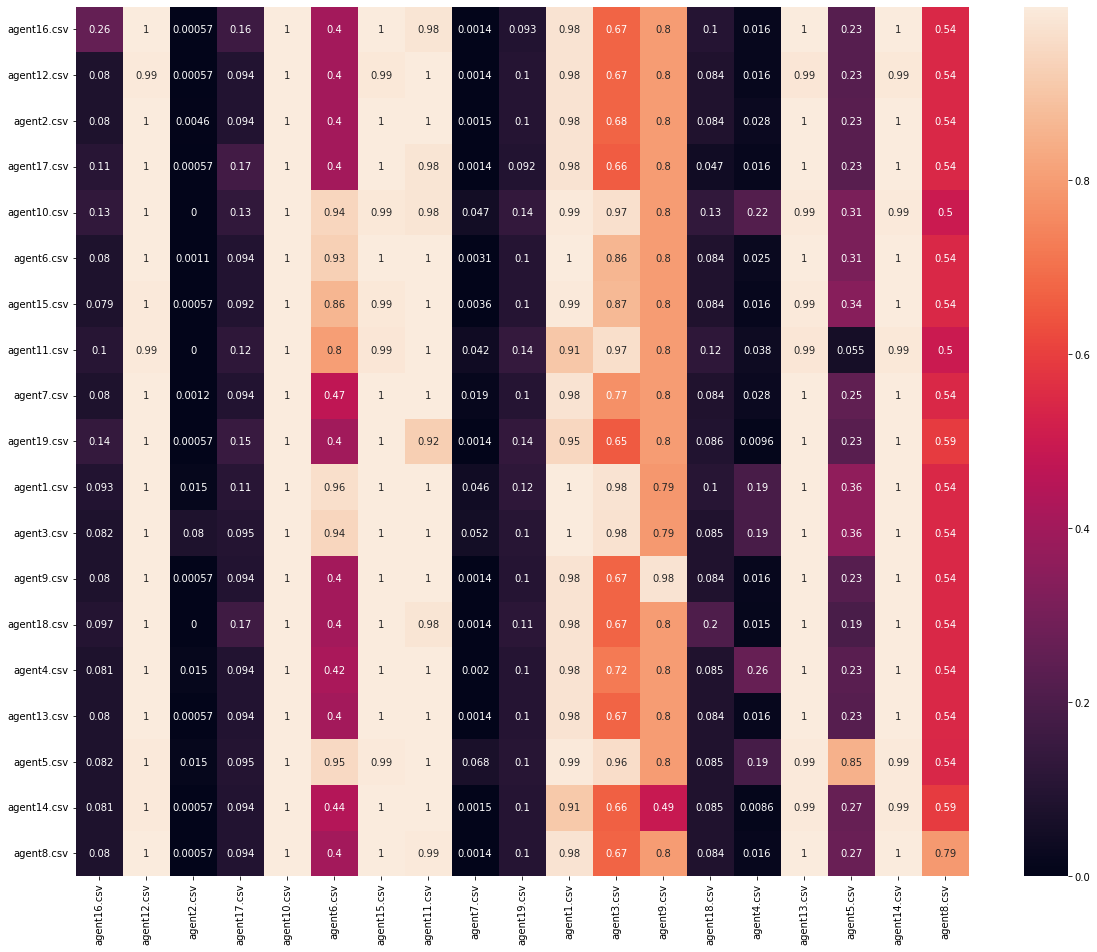

In [23]:
plt.figure(figsize = (20,16))
ax = sns.heatmap(cross_silo_down_efc, xticklabels=cross_silo_down_efc.columns, yticklabels=cross_silo_down_efc.columns, annot=True)

In [26]:
# Calculo da média do modelo de cada um dos agentes avaliado em outros datasets
average_f1_down_score = dict()

for i in range(len(avg_down_info)):
    name = "agent" + str(i+1) + ".csv"
    average_f1_down_score[name] = average(avg_down_info[name].values())

for name, value in average_f1_down_score.items():
    print(value)

0.5949531857640256
0.5269053640806954
0.5943791922333199
0.543500132613621
0.6159548047313015
0.5692307341675509
0.5375511852045106
0.5413861881708257
0.5353718957513339
0.592894105203087
0.5554655492169748
0.5240473582571151
0.5259605500182042
0.511370616482018
0.5662034736156483
0.5385536820860007
0.5277507947728802
0.5349851106625764
0.5297750655742961


## EFC analysis with downsampling + feature selection 

In [31]:
features_to_delete = [
     'DST_TO_SRC_SECOND_BYTES',
     'FTP_COMMAND_RET_CODE',
     'RETRANSMITTED_IN_PKTS',
     'RETRANSMITTED_IN_BYTES',
     'DNS_TTL_ANSWER',
     'SERVER_TCP_FLAGS',
     'DNS_QUERY_TYPE',
     'DNS_QUERY_ID',
     'SRC_TO_DST_SECOND_BYTES',
     'Unnamed: 0',
     'SRC_TO_DST_AVG_THROUGHPUT',
     'MIN_TTL',
     'SHORTEST_FLOW_PKT',
     'IN_BYTES',
     'MAX_TTL',
     'LONGEST_FLOW_PKT',
     'MAX_IP_PKT_LEN',
     'RETRANSMITTED_OUT_PKTS',
     'NUM_PKTS_128_TO_256_BYTES',
     'OUT_PKTS',
     'RETRANSMITTED_OUT_BYTES',
     'MIN_IP_PKT_LEN',
     'NUM_PKTS_256_TO_512_BYTES',
     'DURATION_IN',
     'Label'
]

0    720
1    720
Name: Label, dtype: int64
agent16.csv | cutoff = 324.4376823773045 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.97      0.94      0.95      7114
           1       0.19      0.34      0.25       308

    accuracy                           0.91      7422
   macro avg       0.58      0.64      0.60      7422
weighted avg       0.94      0.91      0.92      7422



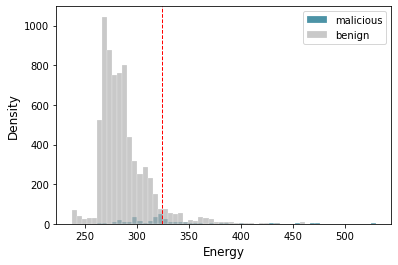

1    21778
0    21778
Name: Label, dtype: int64
agent12.csv | cutoff = 324.0699013562604 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.22      0.94      0.36      9333
           1       1.00      0.99      0.99   2644645

    accuracy                           0.99   2653978
   macro avg       0.61      0.97      0.68   2653978
weighted avg       1.00      0.99      0.99   2653978



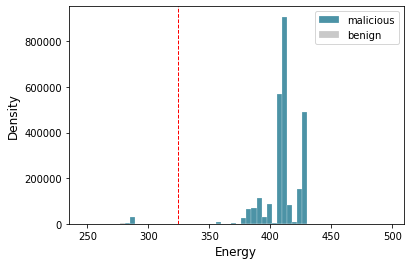

0    146
1    146
Name: Label, dtype: int64
agent2.csv | cutoff = 316.5126054810896 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       1.00      0.86      0.93    216473
           1       0.00      1.00      0.00        62

    accuracy                           0.86    216535
   macro avg       0.50      0.93      0.47    216535
weighted avg       1.00      0.86      0.93    216535



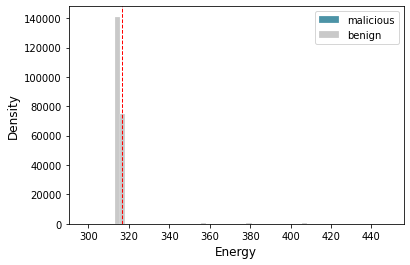

0    761
1    761
Name: Label, dtype: int64
agent17.csv | cutoff = 318.2938990791466 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.96      0.93      0.95      6319
           1       0.15      0.22      0.18       326

    accuracy                           0.90      6645
   macro avg       0.55      0.58      0.56      6645
weighted avg       0.92      0.90      0.91      6645



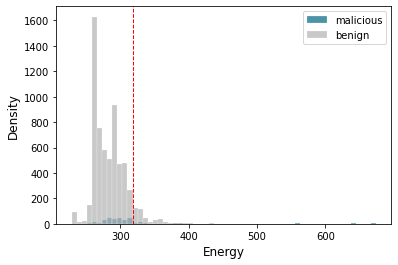

1    3329
0    3329
Name: Label, dtype: int64
agent10.csv | cutoff = 325.4594638977271 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.69      0.95      0.80      1427
           1       1.00      1.00      1.00    324891

    accuracy                           1.00    326318
   macro avg       0.84      0.98      0.90    326318
weighted avg       1.00      1.00      1.00    326318



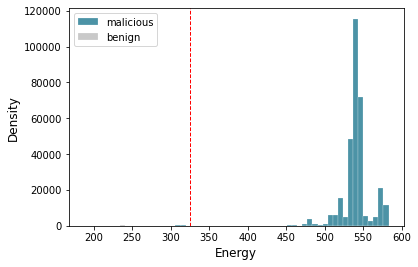

0    66733
1    66733
Name: Label, dtype: int64
agent6.csv | cutoff = 298.55616883940684 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       1.00      0.95      0.97     84614
           1       0.86      1.00      0.93     28600

    accuracy                           0.96    113214
   macro avg       0.93      0.97      0.95    113214
weighted avg       0.97      0.96      0.96    113214



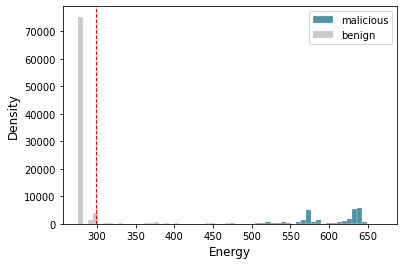

1    2232
0    2232
Name: Label, dtype: int64
agent15.csv | cutoff = 326.4998278301405 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.07      0.94      0.13       956
           1       1.00      0.98      0.99    711539

    accuracy                           0.98    712495
   macro avg       0.54      0.96      0.56    712495
weighted avg       1.00      0.98      0.99    712495



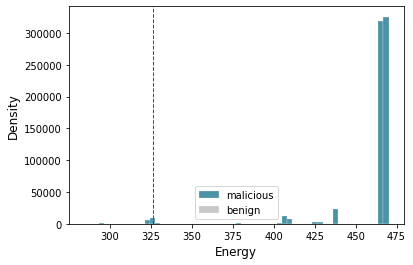

1    933
0    933
Name: Label, dtype: int64
agent11.csv | cutoff = 319.5508486984386 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.50      0.94      0.65       400
           1       1.00      1.00      1.00     92190

    accuracy                           1.00     92590
   macro avg       0.75      0.97      0.82     92590
weighted avg       1.00      1.00      1.00     92590



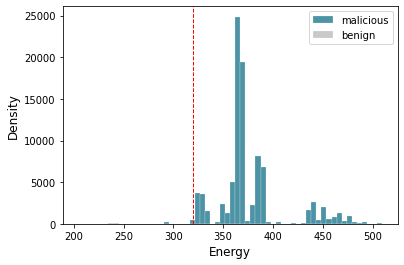

0    169
1    169
Name: Label, dtype: int64
agent7.csv | cutoff = 302.546258041324 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       1.00      0.93      0.96    101072
           1       0.01      1.00      0.02        73

    accuracy                           0.93    101145
   macro avg       0.51      0.96      0.49    101145
weighted avg       1.00      0.93      0.96    101145



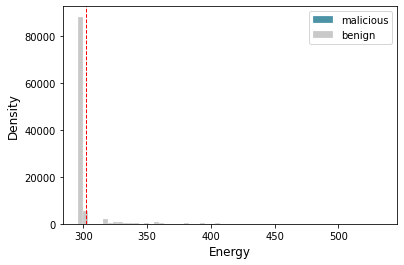

0    749
1    749
Name: Label, dtype: int64
agent19.csv | cutoff = 329.70525078372407 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.96      0.93      0.94      5779
           1       0.17      0.28      0.21       321

    accuracy                           0.89      6100
   macro avg       0.57      0.60      0.58      6100
weighted avg       0.92      0.89      0.90      6100



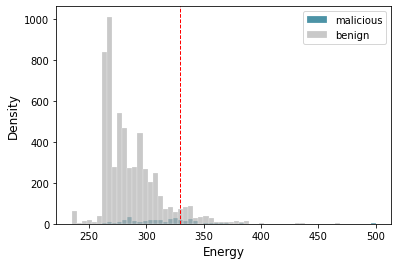

1    45436
0    45436
Name: Label, dtype: int64
agent1.csv | cutoff = 376.92564477070675 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.76      0.95      0.85     19473
           1       1.00      0.99      0.99    445716

    accuracy                           0.99    465189
   macro avg       0.88      0.97      0.92    465189
weighted avg       0.99      0.99      0.99    465189



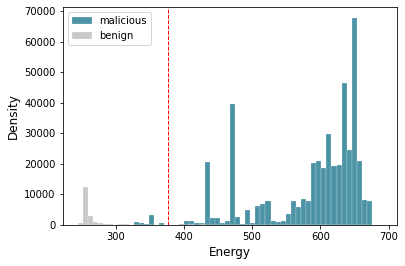

1    207863
0    207863
Name: Label, dtype: int64
agent3.csv | cutoff = 324.2093071980253 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       1.00      0.95      0.97     89084
           1       0.95      1.00      0.98     91792

    accuracy                           0.98    180876
   macro avg       0.98      0.97      0.98    180876
weighted avg       0.98      0.98      0.98    180876



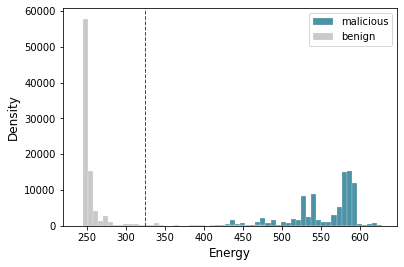

1    997
0    997
Name: Label, dtype: int64
agent9.csv | cutoff = 303.66008833293887 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       1.00      0.91      0.95       427
           1       0.96      1.00      0.98       852

    accuracy                           0.97      1279
   macro avg       0.98      0.95      0.96      1279
weighted avg       0.97      0.97      0.97      1279



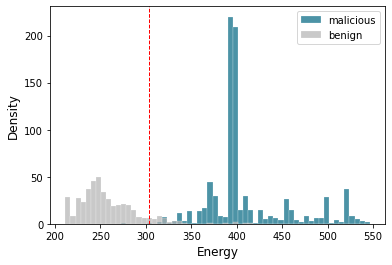

0    658
1    658
Name: Label, dtype: int64
agent18.csv | cutoff = 318.23970743752943 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.97      0.93      0.95      6157
           1       0.16      0.31      0.21       282

    accuracy                           0.90      6439
   macro avg       0.56      0.62      0.58      6439
weighted avg       0.93      0.90      0.91      6439



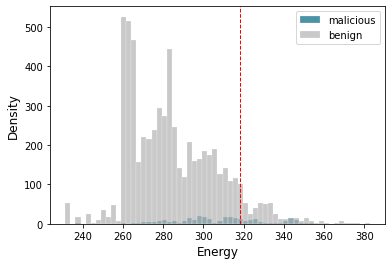

0    3631
1    3631
Name: Label, dtype: int64
agent4.csv | cutoff = 313.62784199048156 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       1.00      0.95      0.97    186216
           1       0.15      1.00      0.25      1556

    accuracy                           0.95    187772
   macro avg       0.57      0.97      0.61    187772
weighted avg       0.99      0.95      0.97    187772



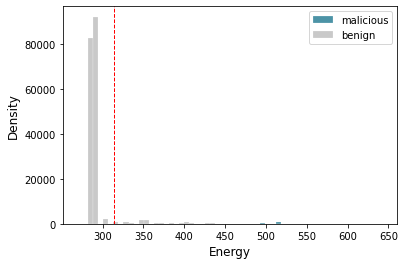

1    2588
0    2588
Name: Label, dtype: int64
agent13.csv | cutoff = 318.5952762710046 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.16      0.95      0.27      1109
           1       1.00      1.00      1.00   1292659

    accuracy                           1.00   1293768
   macro avg       0.58      0.97      0.63   1293768
weighted avg       1.00      1.00      1.00   1293768



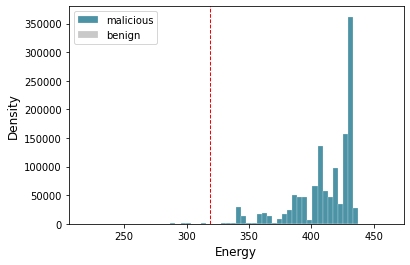

0    63870
1    63870
Name: Label, dtype: int64
agent5.csv | cutoff = 327.2825375042782 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       1.00      0.95      0.97    187168
           1       0.74      1.00      0.85     27373

    accuracy                           0.95    214541
   macro avg       0.87      0.97      0.91    214541
weighted avg       0.97      0.95      0.96    214541



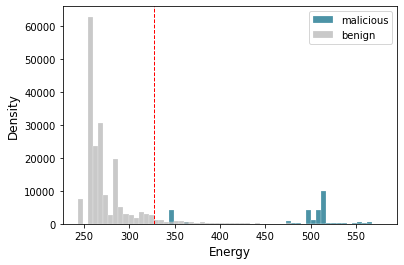

1    2700
0    2700
Name: Label, dtype: int64
agent14.csv | cutoff = 304.41106205334336 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.08      0.94      0.14      1157
           1       1.00      0.98      0.99    849477

    accuracy                           0.98    850634
   macro avg       0.54      0.96      0.57    850634
weighted avg       1.00      0.98      0.99    850634



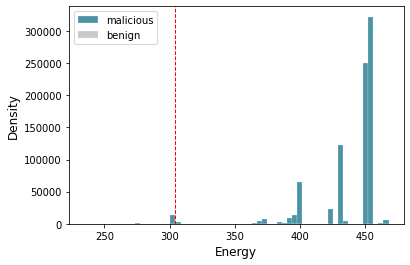

0    26712
1    26712
Name: Label, dtype: int64
agent8.csv | cutoff = 319.3490519539169 
-------------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.84      0.95      0.89     19195
           1       0.89      0.70      0.79     11448

    accuracy                           0.86     30643
   macro avg       0.87      0.83      0.84     30643
weighted avg       0.86      0.86      0.85     30643



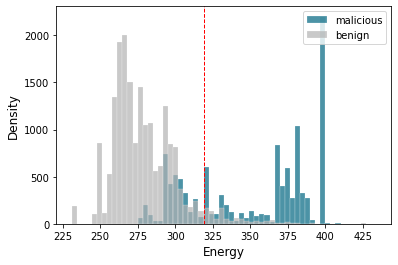

In [32]:
siloed_feat_efc = {}

for key, silo in silos.items():
    
    X = silo.drop(columns=features_to_delete).copy()
    X = preprocess(X)
    y = silo["Label"].copy()
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=42, stratify=y, shuffle=True, test_size=0.3
    )
    
    X_train["Label"] = y_train 
    X_train = rebalance_agent(X_train) 
    y_train = X_train["Label"] 
    X_train = X_train.drop(columns="Label").copy() 
    
    # train and test EFC
    clf = EnergyBasedFlowClassifier(cutoff_quantile=0.95)
    print(y_train.value_counts())
    clf.fit(X_train, y_train)
    
    siloed_feat_efc[key] = clf
    
    y_pred, y_energies = clf.predict(X_test, return_energies=True)
    
    print(key, "| cutoff =", clf.estimators_[0].cutoff_, "\n-------------------------------------------------------------------\n", classification_report(y_test, y_pred))
    
    # ploting energies
    benign = np.where(y_test == 0)[0]
    malicious = np.where(y_test == 1)[0]

    benign_energies = y_energies[benign]
    malicious_energies = y_energies[malicious]
    cutoff = clf.estimators_[0].cutoff_

    bins = np.histogram(y_energies, bins=60)[1]

    plt.hist(
        malicious_energies,
        bins,
        facecolor="#006680",
        alpha=0.7,
        ec="white",
        linewidth=0.3,
        label="malicious",
    )
    plt.hist(
        benign_energies,
        bins,
        facecolor="#b3b3b3",
        alpha=0.7,
        ec="white",
        linewidth=0.3,
        label="benign",
    )
    plt.axvline(cutoff, color="r", linestyle="dashed", linewidth=1)
    plt.legend()

    plt.xlabel("Energy", fontsize=12)
    plt.ylabel("Density", fontsize=12)

    plt.show()
    

In [33]:
data_feat = {}
full_feat = []
avg_feat_info = {} 

for model_key, model in siloed_feat_efc.items():
    for key, silo in silos.items():
        #if model_key == key:
        #    continue
            
        X = silo.drop(columns=features_to_delete).copy()
        #X.dropna(inplace=True)
        X = preprocess(X)
        y = silo["Label"].copy()
    
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, random_state=42, stratify=y, shuffle=True, test_size=0.3
        )
        
        y_pred = model.predict(X_test)
        score = f1_score(y_test, y_pred)
        data_feat[key] = score
        print(model_key, "on", key, "--> f1-score =", score)
    
    full_feat.append(data_feat)
    avg_feat_info[model_key] = data_feat
    data_feat = {}

agent16.csv on agent16.csv --> f1-score = 0.2488262910798122
agent16.csv on agent12.csv --> f1-score = 0.998238975763694
agent16.csv on agent2.csv --> f1-score = 0.0005725208462227476
agent16.csv on agent17.csv --> f1-score = 0.14473684210526316
agent16.csv on agent10.csv --> f1-score = 0.9980017908623018
agent16.csv on agent6.csv --> f1-score = 0.405298992224923
agent16.csv on agent15.csv --> f1-score = 0.9993286677143944
agent16.csv on agent11.csv --> f1-score = 0.9826222764817809
agent16.csv on agent7.csv --> f1-score = 0.001457696838994389
agent16.csv on agent19.csv --> f1-score = 0.071301247771836
agent16.csv on agent1.csv --> f1-score = 0.9773861715613776
agent16.csv on agent3.csv --> f1-score = 0.6793191634252046
agent16.csv on agent9.csv --> f1-score = 0.7996245893946504
agent16.csv on agent18.csv --> f1-score = 0.06379821958456973
agent16.csv on agent4.csv --> f1-score = 0.01644064304468875
agent16.csv on agent13.csv --> f1-score = 0.9995712231584343
agent16.csv on agent5.csv 

In [34]:
cross_silo_feat_efc = pd.DataFrame(full_feat, index=list(siloed_feat_efc.keys()))

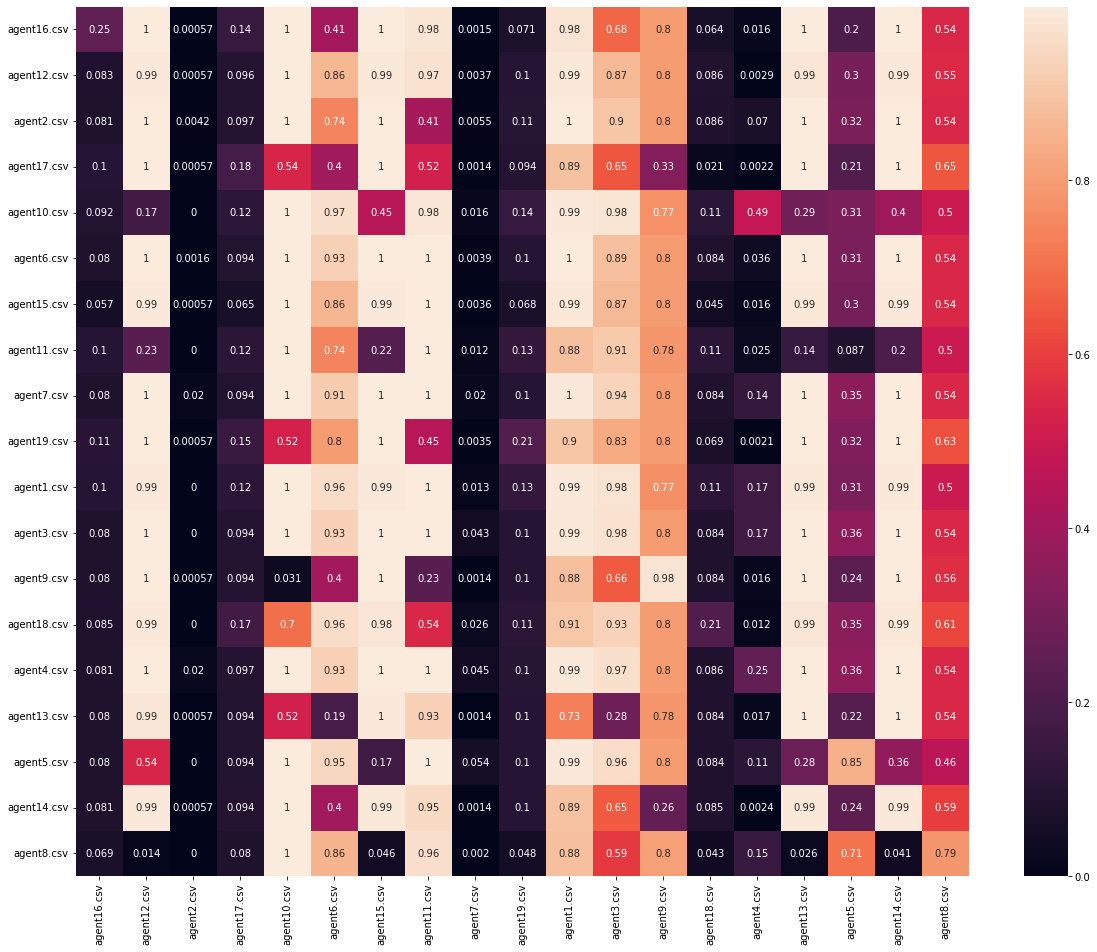

In [35]:
plt.figure(figsize = (20,16))
ax = sns.heatmap(cross_silo_feat_efc, xticklabels=cross_silo_feat_efc.columns, yticklabels=cross_silo_feat_efc.columns, annot=True)

In [36]:
# Calculo da média do modelo de cada um dos agentes avaliado em outros datasets
average_f1_feat_score = dict()

for i in range(len(avg_feat_info)):
    name = "agent" + str(i+1) + ".csv"
    average_f1_feat_score[name] = average(avg_feat_info[name].values())

for name, value in average_f1_feat_score.items():
    print(value)

0.5850330696969052
0.5344888820246613
0.5877489290644471
0.593191224869763
0.4670019433307759
0.571344013984893
0.5827216966947906
0.3742641822912122
0.4398588612470242
0.4621633052753589
0.3789562109255009
0.5619693253850157
0.45080140802860574
0.49065396965267527
0.5570066652110942
0.5331910508187653
0.4514393431996695
0.5460920385817607
0.5164725431622772
